# Neural Network from Scratch
---

## Import Libraries

In [200]:
import numpy as np
import torch
import matplotlib.pyplot as plt

%matplotlib inline

## Generate Data

In [24]:
n = 100

In [25]:
x = torch.ones(n, 2); x[:5]

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [26]:
x[:,0].uniform_(-1,1);x[:5]

tensor([[ 0.7518,  1.0000],
        [ 0.1875,  1.0000],
        [-0.0411,  1.0000],
        [-0.4493,  1.0000],
        [-0.6082,  1.0000]])

In [27]:
a = torch.tensor([3.0,2.0]); a.shape

torch.Size([2])

In [32]:
y = x@a + torch.rand(n); y[:5]

tensor([4.3203, 3.1663, 2.2375, 1.0614, 0.6307])

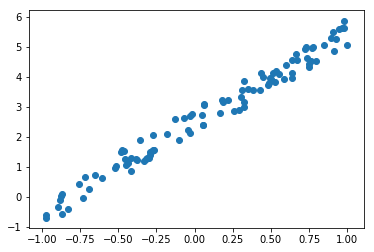

In [33]:
plt.scatter(x[:,0], y)

## Random Guessing

In [95]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [96]:
guess_weights = torch.tensor([1.,1])

In [97]:
y_hat = x@guess_weights

In [98]:
mse(y_hat,y)

tensor(4.1598)

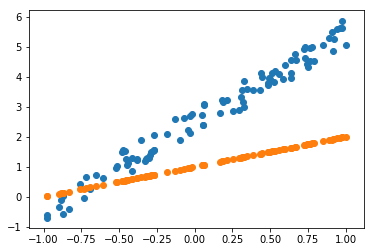

In [99]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)

## Gradient Descent

In [176]:
x[:5], y[:5]

(tensor([[ 0.7518,  1.0000],
         [ 0.1875,  1.0000],
         [-0.0411,  1.0000],
         [-0.4493,  1.0000],
         [-0.6082,  1.0000]]),
 tensor([4.3203, 3.1663, 2.2375, 1.0614, 0.6307]))

In [177]:
model = torch.tensor([1.,1.], requires_grad=True)

In [178]:
y_pred = x@model
y_pred = y_pred.detach().numpy()

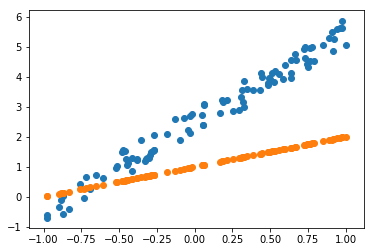

In [179]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_pred)

In [202]:
def gd_update(x, y, model, lr, iteration, debug=False):
    y_hat = x@model
    loss = mse(y_hat, y)
    if iteration%10 == 0:
        print(loss)
    loss.backward()
    with torch.no_grad():
        if debug:
            print(model.grad)
            print(model)
            print('===')
        model.sub_(lr * model.grad)
        model.grad.zero_()

In [184]:
lr=0.1
for i in range(100):
    gd_update(x,y,model,lr,i)

tensor(0.1248, grad_fn=<MeanBackward1>)
tensor(0.0708, grad_fn=<MeanBackward1>)
tensor(0.0702, grad_fn=<MeanBackward1>)
tensor(0.0702, grad_fn=<MeanBackward1>)
tensor(0.0702, grad_fn=<MeanBackward1>)
tensor(0.0702, grad_fn=<MeanBackward1>)
tensor(0.0702, grad_fn=<MeanBackward1>)
tensor(0.0702, grad_fn=<MeanBackward1>)
tensor(0.0702, grad_fn=<MeanBackward1>)
tensor(0.0702, grad_fn=<MeanBackward1>)


In [185]:
y_pred = x@model
y_pred = y_pred.detach().numpy()

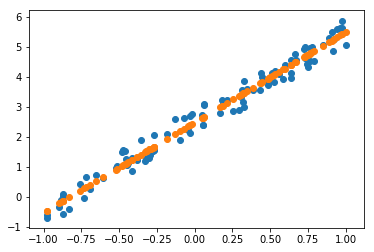

In [186]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_pred)

## Training Animation

In [241]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [254]:
lr = 0.1

In [255]:
model = torch.nn.Parameter(torch.tensor([-1.,1])); model

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [256]:
fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
y_pred = x@model
y_pred = y_pred.detach().numpy()
line, = plt.plot(x[:,0].numpy(), y_pred)
plt.close()

In [257]:
def animate(i):
    gd_update(x, y, model, lr, i)
    y_pred = x@model
    y_pred = y_pred.detach().numpy()
    line.set_ydata(y_pred)
    return line,

In [258]:
animation.FuncAnimation(fig, animate, np.arange(0,100), interval=20)

tensor(8.7235, grad_fn=<MeanBackward1>)
tensor(6.6701, grad_fn=<MeanBackward1>)
tensor(1.1628, grad_fn=<MeanBackward1>)
tensor(0.3536, grad_fn=<MeanBackward1>)
tensor(0.1455, grad_fn=<MeanBackward1>)
tensor(0.0902, grad_fn=<MeanBackward1>)
tensor(0.0755, grad_fn=<MeanBackward1>)
tensor(0.0716, grad_fn=<MeanBackward1>)
tensor(0.0706, grad_fn=<MeanBackward1>)
tensor(0.0703, grad_fn=<MeanBackward1>)
tensor(0.0702, grad_fn=<MeanBackward1>)


## Stochastic Gradient Descent (mini-batches)

In [277]:
x[:5], y[:5]

(tensor([[ 0.7518,  1.0000],
         [ 0.1875,  1.0000],
         [-0.0411,  1.0000],
         [-0.4493,  1.0000],
         [-0.6082,  1.0000]]),
 tensor([4.3203, 3.1663, 2.2375, 1.0614, 0.6307]))

In [278]:
model = torch.tensor([1.,1.], requires_grad=True)

In [279]:
y_pred = x@model
y_pred = y_pred.detach().numpy()

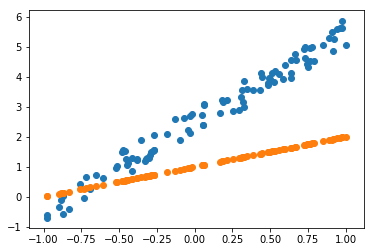

In [280]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_pred)

In [281]:
def sgd_update(x, y, model, lr, bs, iteration, debug=False):
    rand_indx = np.random.randint(0, x.shape[0], bs)
    y_hat = x[rand_indx]@model
    loss = mse(y_hat, y[rand_indx])
    if iteration%10 == 0:
        print(loss)
    loss.backward()
    with torch.no_grad():
        if debug:
            print(model.grad)
            print(model)
            print('===')
        model.sub_(lr * model.grad)
        model.grad.zero_()

In [282]:
lr=0.1
bs=10
for i in range(100):
    sgd_update(x,y,model,lr,bs,i)

tensor(3.1133, grad_fn=<MeanBackward1>)
tensor(0.4593, grad_fn=<MeanBackward1>)
tensor(0.2301, grad_fn=<MeanBackward1>)
tensor(0.0691, grad_fn=<MeanBackward1>)
tensor(0.1094, grad_fn=<MeanBackward1>)
tensor(0.0608, grad_fn=<MeanBackward1>)
tensor(0.0569, grad_fn=<MeanBackward1>)
tensor(0.0931, grad_fn=<MeanBackward1>)
tensor(0.0641, grad_fn=<MeanBackward1>)
tensor(0.0689, grad_fn=<MeanBackward1>)


In [283]:
y_pred = x@model
y_pred = y_pred.detach().numpy()

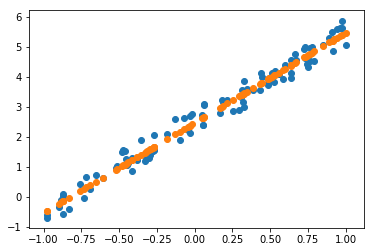

In [284]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_pred)

## Training Animation

In [303]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [304]:
lr = 0.1
bs=1

In [305]:
model = torch.nn.Parameter(torch.tensor([-1.,1])); model

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [306]:
fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
y_pred = x@model
y_pred = y_pred.detach().numpy()
line, = plt.plot(x[:,0].numpy(), y_pred)
plt.close()

In [307]:
def animate(i):
    sgd_update(x, y, model, lr, bs, i)
    y_pred = x@model
    y_pred = y_pred.detach().numpy()
    line.set_ydata(y_pred)
    return line,

In [308]:
animation.FuncAnimation(fig, animate, np.arange(0,100), interval=20)

tensor(0.3069, grad_fn=<MeanBackward1>)
tensor(5.9227, grad_fn=<MeanBackward1>)
tensor(0.7210, grad_fn=<MeanBackward1>)
tensor(3.2757, grad_fn=<MeanBackward1>)
tensor(0.1082, grad_fn=<MeanBackward1>)
tensor(0.0249, grad_fn=<MeanBackward1>)
tensor(0.1183, grad_fn=<MeanBackward1>)
tensor(0.0507, grad_fn=<MeanBackward1>)
tensor(9.8560e-05, grad_fn=<MeanBackward1>)
tensor(0.0631, grad_fn=<MeanBackward1>)
tensor(0.0127, grad_fn=<MeanBackward1>)


## Conclusion
---

**Learning Rate**
* We find that the learning rate has major effect on the training process. A high learning rate of 1 (or even -1) makes the model oscillate violently and diverge quickly (with -1 only the direction is reversed). This is because even though the gradients give us a good direction to move towards, we do so in arbitary magnitude. This magnitude is ever increasing since with each step we move slightly farther away.

**Batch Size**
* The lower the batch size the more the model jumps abruptly at every step. With a higher batch size, the model iterations are more sure and confident about the preceeding steps which makes the training process very smooth.
